index   energy       theta            phi              px                 py                pz       
----- --------- ---------------- ------------- ------------------ ------------------ ----------------
   11 0.0445816   0.385320022564  1.9731898791   -0.0065621072688    0.0154178514619  0.0413127608232
   12 0.0686365 -0.0382899596424 2.16523491187     0.106847848342  -0.00409320037212 0.00999849907183
   13 0.0948539    0.39113554349 1.45927639548   0.00402442460805     0.035937318092  0.0876902232413
   15 0.0443405   0.209933249809 4.19968851847   -0.0045326808586  -0.00805223761735  0.0433670438568
   16 0.0737103  -0.577968417679 3.40234498977    0.0227047859381   -0.0148096206211  0.0710144130371
   17 0.0336318   0.432386218434 1.27906828167   0.00405325736205    0.0134975543568  0.0305365803147
   18 0.0869627  -0.459212208876 2.74994547282   -0.0467224987572    0.0231027796709  0.0920687704396
   19 0.0824976   0.264071744822 3.12398865864   -0.0215296369404  0.0003790467764

Welcome to JupyROOT 6.09/03
choose s to see jets from one event, choose m to see distribution of #jets
from 15 different combinations of p and r
(multiple pR:p = [-1,0,1],R = [0.01, 0.05, 0.1, 0.5, 1]
single p_R pair or multiple p_R(s/m)?s
input the R value here:0.001
input the p value here:-1
single pr jet
index   energy        theta            phi              px                 py                pz      
----- --------- ----------------- ------------- ------------------ ------------------ ---------------
    7 0.0446297 0.000511558968028 3.83221252238 -1.75991045322e-05 -1.45435259981e-05 0.0446297262252
    8  0.085311    0.333211535047 1.54720808174    0.0032686106291   0.00113132220977 0.0852655284963
   11 0.0569199    0.576430052284   2.735448967   -0.0284995992616     0.012256368542 0.0477224415956
   19 0.0450384    0.160227739837 5.80839819066   0.00639077197943  -0.00328487569253 0.0444615277332
   21  0.064428   0.0137951282337 1.96087078538  -0.00033795902217  0.000822000

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


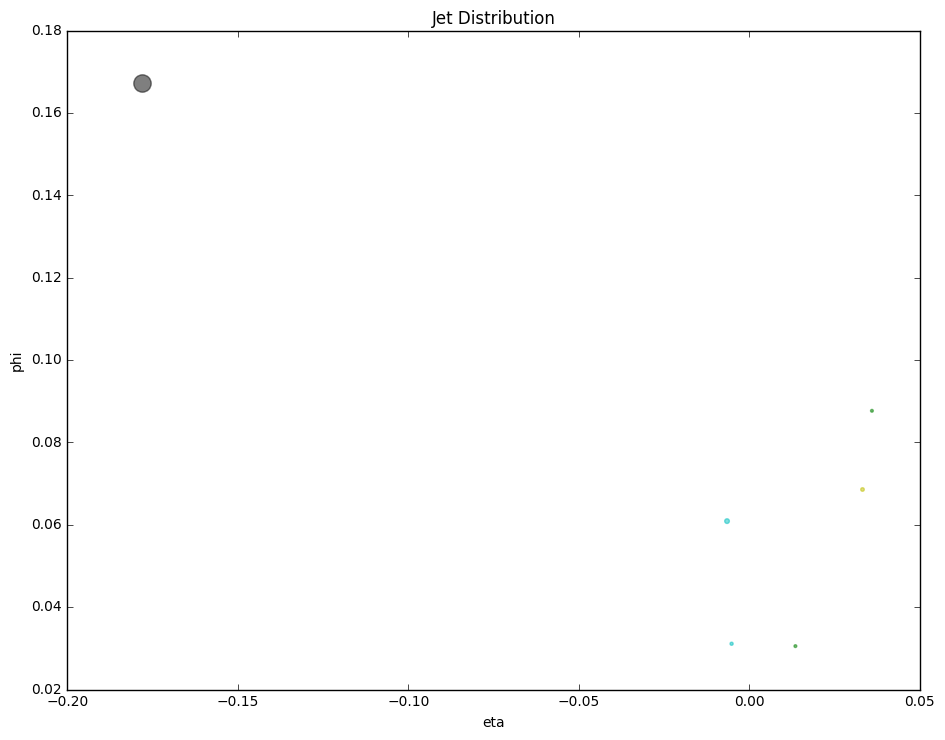

In [1]:
# this program is to plot the number of jets per event with the 15 different pairs of p and R
# Anni Xiong
%matplotlib inline
import MC_pregraph3D_ as mp3
import MC_3d_saving_ as mcs
import antikt as ak
import matplotlib.pyplot as plt
import itertools 
import numpy as np
import random
c = ['g', 'b', 'r', 'c','y','k']
def pr_plotting(jetnumber,c):
    plt.style.use('seaborn-poster')
    fig = plt.figure()
    plt.axis([-0.2, 1.2, -1.2, 1.2])
    for k in jetnumber.keys():
        #k[p, r]
        x = k[1]
        y = k[0]
        number = jetnumber[k]
        colors = random.choice(c)
        plt.text(x, y, str(number) , color = colors  ,fontsize = '10')
    plt.xlabel('R value')
    plt.ylabel('p value')
    plt.title('Number of jets, Min_energy:'+ str(mp3.MinEnergy))
    plt.show()

def plot_single_event(angular_v, jet,c):
    fig,ax = plt.subplots(1,1)   
    fig.set_size_inches(11,8.5) 
    for v in jet: 
        length = len(v)
        area = []
        eta = []
        phi = []
        colors = random.choice(c)
        for i in v:
            i = i,
            area.append(angular_v[i][0])
            eta.append(angular_v[i][1])
            phi.append(angular_v[i][2])
        a = [x * 1000 for x in area]    
        plt.scatter(eta, phi,s = a,  color=colors, alpha=0.5)
    ax.set_aspect('auto')
    plt.xlabel('eta')
    plt.ylabel('phi')
    plt.title('Jet Distribution')
    plt.show()
    
# the part respnsible for the interactive mode
print('choose s to see jets from one event, choose m to see distribution of #jets')
print('from 15 different combinations of p and r')
print('(multiple pR:p = [-1,0,1],R = [0.01, 0.05, 0.1, 0.5, 1]')
a1 = str(input('single p_R pair or multiple p_R(s/m)?'))

if a1 == 'm':
    multiplepr_jets = {}
    jetnumber = {}
    p = [-1,0,1]
    R = [0.01, 0.05, 0.1, 0.5, 1]
    pR_pair = list(itertools.product(p,R))                    
    for i,pr in enumerate(pR_pair):
        p = pr[0]
        R = pr[1]
        final3 = mcs.final3
        t3 = mcs.t3
        
        jet = ak.main(p, R, final3, t3, mp3, mcs)   
        multiplepr_jets[i] = jet
        jetnumber[pr] = len(jet)
    print('multiple pr jets', multiplepr_jets)
    print('number of jets', jetnumber)
    pr_plotting(jetnumber, c)
elif a1 == 's':
    a1R = float(input("input the R value here:"))
    a1p = float(input('input the p value here:'))
    print('single pr jet')
    final3 = mcs.final3
    t3 = mcs.t3
    jet = ak.main(a1R, a1p, final3, t3, mp3, mcs) 
    angular_v = ak.v_ang
    plot_single_event(angular_v, jet,c)


